In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import random

## Getting software annotations

In [18]:
software_annot = pd.read_csv('../data/software_annotation.csv')
software_annot['Software Name'] = [s.split('_rank')[0] for s in software_annot['Software']]

In [19]:
type_dct = dict(zip(software_annot['Software Name'],
                    software_annot['Predictor Type']))
info_dct = dict(zip(software_annot['Software Name'],
                    software_annot['Information used']))
struc_dct = dict(zip(software_annot['Software Name'],
                    software_annot['Protein structure']))

In [20]:
types = set(type_dct.values())
type_colors = sns.color_palette('Greys',n_colors=len(types))
type_color_dict = dict(zip(types,type_colors))

infos = set(info_dct.values())
info_colors = sns.color_palette('husl',n_colors=len(infos))
info_color_dict = dict(zip(infos,info_colors))

strucs = set(struc_dct.values())
struc_colors = sns.color_palette('hls',n_colors=len(strucs))
struc_color_dict = dict(zip(strucs,struc_colors))

## Getting dataframes 

In [21]:
data_frames = {'random': pd.read_csv('../data/rand_rho_df.csv',index_col=0),
               'real': pd.read_csv('../data/diff_rho_df.csv',index_col=0)}

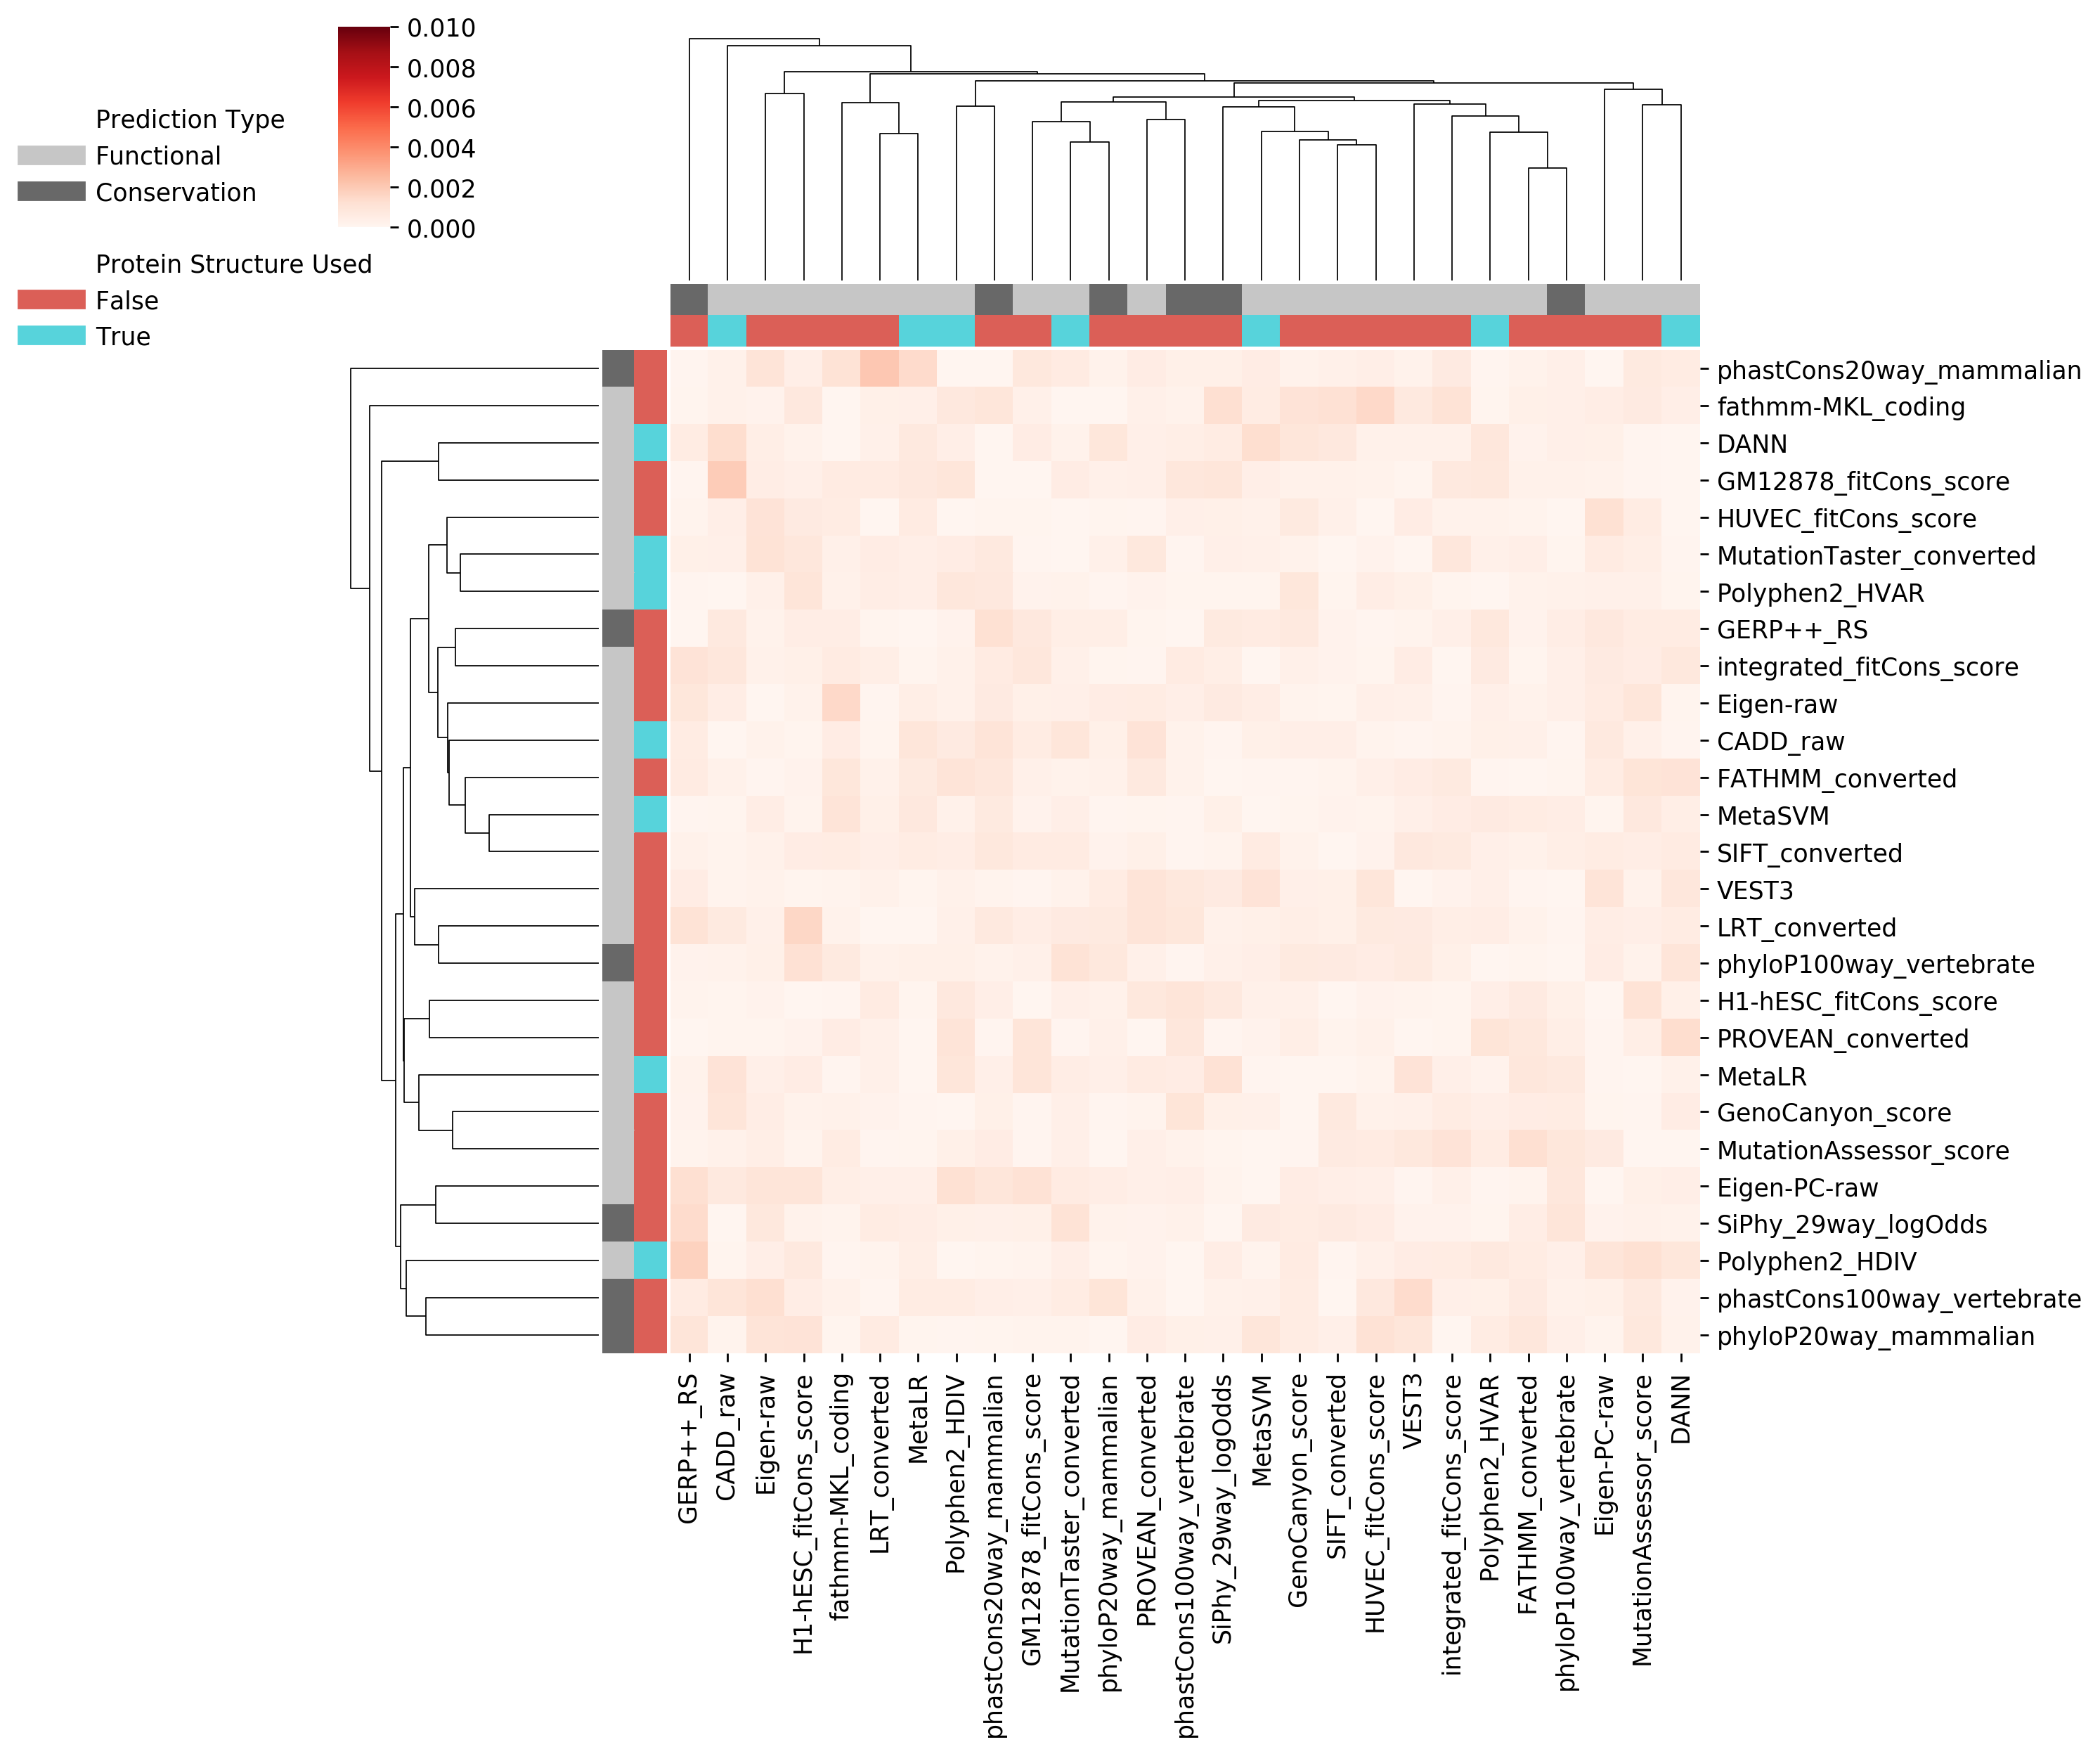

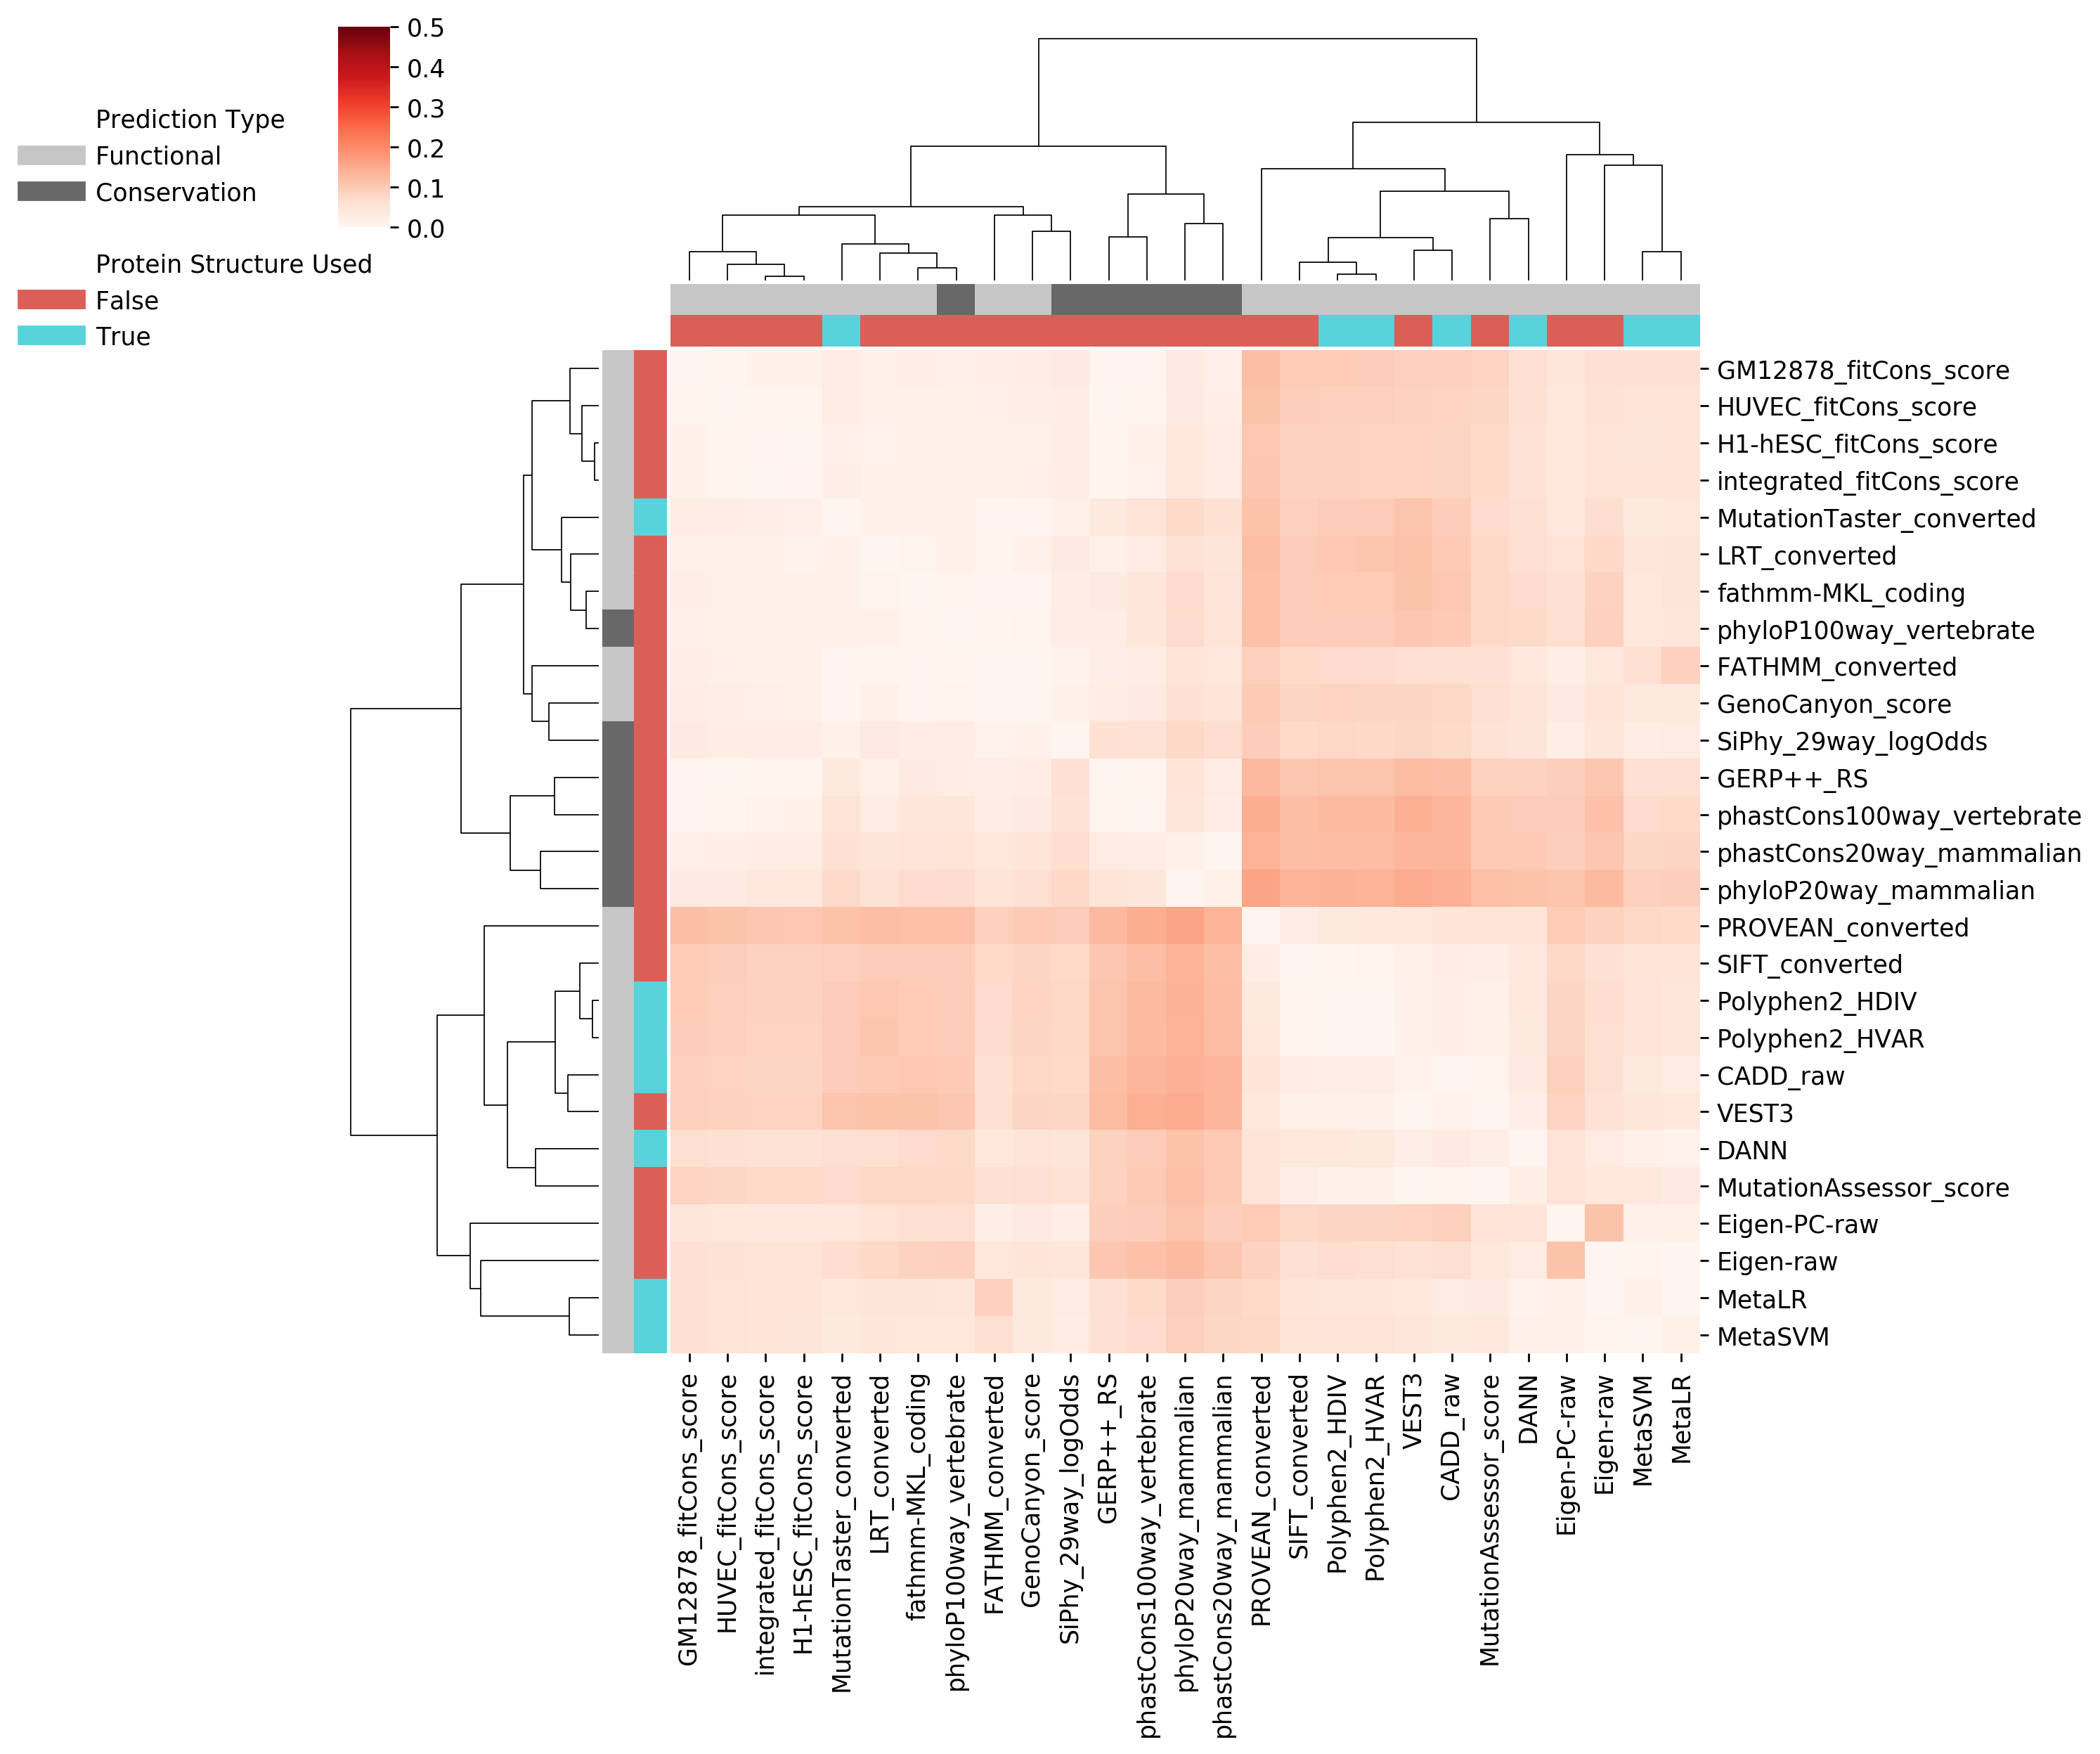

In [25]:
mpl.rcParams["figure.dpi"] = 250

for df_type in data_frames.keys():

    corr_df = data_frames[df_type]
    corr_df = corr_df.fillna(0)
    corr_df.index = [s.split('_rank')[0] for s in corr_df.index]
    corr_df.columns = [s.split('_rank')[0] for s in corr_df.columns]
    
    vmax = 0.01 if df_type == 'random' else 0.5
    
    cg = sns.clustermap(np.absolute(corr_df),
                   vmin=0,
                   vmax=vmax,
                   figsize=(10,10),

                   #cbar_kws={'label':'spearman rho'},
                   row_colors=[[type_color_dict[type_dct[c]] for c in corr_df.index],
                               #[info_color_dict[info_dct[c]] for c in corr_df.index],
                               [struc_color_dict[struc_dct[c]] for c in corr_df.index]],
                   col_colors=[[type_color_dict[type_dct[c]] for c in corr_df.columns],
                               #[info_color_dict[info_dct[c]] for c in corr_df.columns],
                               [struc_color_dict[struc_dct[c]] for c in corr_df.columns]],
                   cmap='Reds')

    colors = type_color_dict.values()
    lines = [Line2D([0], [0],linewidth=0)] + [Line2D([0], [0], color=c, linewidth=8, linestyle='-') for c in colors] + [Line2D([0], [0],linewidth=0)]
    labels = ['Prediction Type'] + list(type_color_dict.keys()) + ['']

#     colors = info_color_dict.values()
#     lines = lines + [Line2D([0], [0],linewidth=0)] + [Line2D([0], [0], color=c, linewidth=8, linestyle='-') for c in colors] + [Line2D([0], [0],linewidth=0)]
#     labels = labels + ['Information Used'] + list(info_color_dict.keys()) + ['']

    colors = struc_color_dict.values()
    lines = lines + [Line2D([0], [0],linewidth=0)] + [Line2D([0], [0], color=c, linewidth=8, linestyle='-') for c in colors] + [Line2D([0], [0],linewidth=0)]
    labels = labels + ['Protein Structure Used'] + list(struc_color_dict.keys()) + ['']

    plt.legend(lines, labels,bbox_to_anchor=(1.1,0.7),frameon=False)
    plt.savefig('../output/{}_clustermap.pdf'.format(df_type),bbox_inches='tight',format='pdf')
    plt.show()